The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


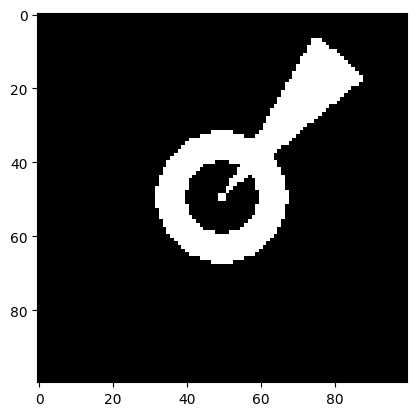

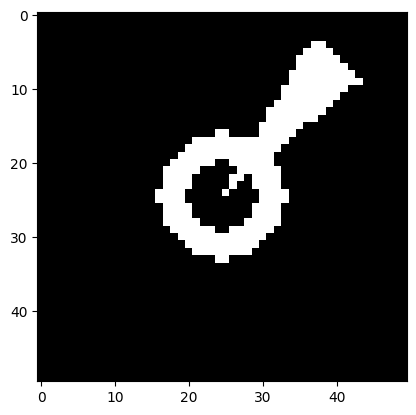

In [23]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import os
opj = os.path.join
import numpy as np
import scipy.io as sio
import tensorflow as tf
# tf.config.threading.set_intra_op_parallelism_threads(1)
# tf.config.threading.set_inter_op_parallelism_threads(1)
# tf.config.set_visible_devices([], 'GPU')
from dpu_mini.fs_tools import *
from dpu_mini.mesh_maker import *
from dpu_mini.stats import *
import pandas as pd
import pickle

dm_path = '/Users/marcusdaghlian/CVL Dropbox/Marcus  Daghlian/240522NG/hypot/code/hypot_code/postproc/aps_pRF.mat'
dm_data = sio.loadmat(dm_path)
dm_in = dm_data['ApFrm']
plt.imshow(dm_in[:,:,51], cmap='gray')
from scipy.ndimage import zoom

og_pix = dm_in.shape[0]
n_pix = 50
pix_ratio = n_pix / og_pix
dm = zoom(dm_in, (pix_ratio, pix_ratio, 1), order=0)  # nearest-neighbor
plt.figure()
plt.imshow(dm[:,:,51], cmap='gray')
# np.save('dm.npy', dm)

# LOAD DATA     

In [3]:
from dpu_mini.utils import *
import nibabel as nib
gii_folder = '/Users/marcusdaghlian/CVL Dropbox/Marcus  Daghlian/240522NG/hypot/derivatives/sf2_mcalign/sub-hp01/ses-01'
gii_folder = '/Users/marcusdaghlian/CVL Dropbox/Marcus  Daghlian/240522NG/hypot/derivatives/sf2_coregAFNITOP/sub-hp01/ses-01'
gii_files = os.listdir(gii_folder)
gii_files = [f for f in gii_files if '.gii' in f]
gii_files = [f for f in gii_files if 'SMOOTH' not in f]

print(len(gii_files))
# bloop
# bloop
# load as arrays LE & RE 
data = {}
for task in ['pRFLE', 'pRFRE']:
    t_files = [f for f in gii_files if task in f]
    hemi_data = {}
    for hemi in ['L', 'R']:
        thisf = [f for f in t_files if f'hemi-{hemi}' in f]
        tdata = []
        for tgii in thisf:
            tgii_nib = nib.load(opj(gii_folder, tgii))
            tgii_data = [i.data for i in tgii_nib.darrays]
            tgii_data = np.array(tgii_data)[4:,:] # drop first 4 trigger scans             
            tgii_data = dag_detrending(tgii_data.T, detrend_param=2).T
            # tgii_data = dag_psc(tgii_data.T).T
            tdata.append(tgii_data)
            # break
        hemi_data[hemi] = np.mean(tdata, axis=0)
        print(hemi_data[hemi].shape)
        # tRf = [f for f in t_files if 'hemi-R' in f]
        # print(tL)   
    data[task] = pd.DataFrame(np.hstack([
        hemi_data['L'], hemi_data['R']
    ]))



12


/Users/marcusdaghlian/programs/dpu_mini/dpu_mini/stats.py:205: RuntimeWarning: invalid value encountered in divide
  ts_out = (ts_in - baseline_mean) / baseline_mean * 100


(348, 139218)
(348, 137925)
(348, 139218)
(348, 137925)


In [2]:
import os
pyb_folder = '/Users/marcusdaghlian/CVL Dropbox/Marcus  Daghlian/240522NG/hypot/derivatives/pybest20/sub-hp01/ses-fprep/denoising'
pyb_files = os.listdir(pyb_folder)
pyb_files = [p for p in pyb_files if 'bold' in p]
data = {}
for task in ['pRFLE', 'pRFRE']:
    t_files = [f for f in pyb_files if task in f]
    t_files = [f for f in t_files if 'run' in f]
    print(t_files)
    hemi_data = {}
    for hemi in ['L', 'R']:
        thisf = [f for f in t_files if f'hemi-{hemi}' in f]
        tdata = []
        for tnpy in thisf:
            tdata.append(np.load(opj(pyb_folder,tnpy))[4:,:])
        hemi_data[hemi] = np.mean(tdata, axis=0)
        print(hemi_data[hemi].shape)
    data[task] = pd.DataFrame(np.hstack([
        hemi_data['L'], hemi_data['R']
    ]))



['sub-hp01_ses-fprep_task-pRFLE_run-2_space-fsnative_hemi-R_desc-denoised_bold.npy', 'sub-hp01_ses-fprep_task-pRFLE_run-1_space-fsnative_hemi-L_desc-denoised_bold.npy', 'sub-hp01_ses-fprep_task-pRFLE_run-3_space-fsnative_hemi-L_desc-denoised_bold.npy', 'sub-hp01_ses-fprep_task-pRFLE_run-1_space-fsnative_hemi-R_desc-denoised_bold.npy', 'sub-hp01_ses-fprep_task-pRFLE_run-2_space-fsnative_hemi-L_desc-denoised_bold.npy', 'sub-hp01_ses-fprep_task-pRFLE_run-3_space-fsnative_hemi-R_desc-denoised_bold.npy']
(348, 139218)
(348, 137925)
['sub-hp01_ses-fprep_task-pRFRE_run-2_space-fsnative_hemi-L_desc-denoised_bold.npy', 'sub-hp01_ses-fprep_task-pRFRE_run-1_space-fsnative_hemi-R_desc-denoised_bold.npy', 'sub-hp01_ses-fprep_task-pRFRE_run-3_space-fsnative_hemi-R_desc-denoised_bold.npy', 'sub-hp01_ses-fprep_task-pRFRE_run-1_space-fsnative_hemi-L_desc-denoised_bold.npy', 'sub-hp01_ses-fprep_task-pRFRE_run-2_space-fsnative_hemi-R_desc-denoised_bold.npy', 'sub-hp01_ses-fprep_task-pRFRE_run-3_space-fsn

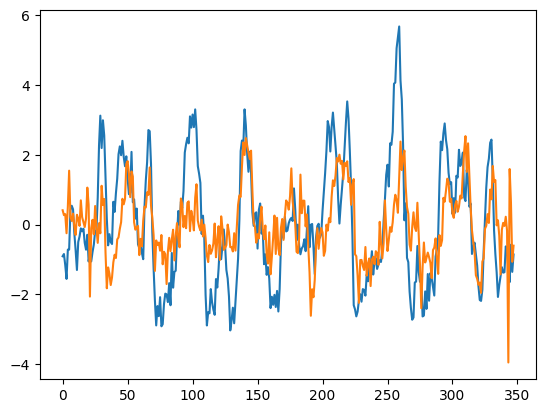

In [19]:
i =0
plt.plot(data['pRFLE'].iloc[:,i])
plt.plot(data['pRFRE'].iloc[:,i])

# plt.plot(datap[task].iloc[:,i])

In [25]:
datap[task].shape

(1056, 277143)

In [22]:
data[task]

,0,1,2,3,4,5,6,7,8,9,...,277133,277134,277135,277136,277137,277138,277139,277140,277141,277142
0,1.753786,-0.714987,0.550795,0.504139,0.504139,-0.473628,0.246401,0.385543,-0.047803,0.080874,...,0.420098,1.387575,0.0,-1.173546,0.787900,3.801389,6.384036,-1.360770,-15.068355,0.519271
1,1.135406,-0.965644,0.122607,0.689872,0.689872,-0.519596,0.576824,0.638059,0.140499,0.503390,...,0.427497,1.399485,0.0,0.984885,0.394858,-4.491759,0.331936,-1.810913,-15.333243,-0.303884
2,0.491581,-0.510742,0.009391,-0.047238,-0.047238,-0.558007,-0.109248,-0.075223,-0.479661,-0.151319,...,1.324455,-1.579549,0.0,0.500607,1.049121,-4.397795,-2.670449,1.597599,-12.813077,0.434102
3,0.365103,0.439922,0.403738,-0.590201,-0.590201,0.038220,-0.766099,-0.671438,-0.452788,-0.877832,...,0.624105,1.006523,0.0,2.388788,-0.123947,-0.194261,-7.414656,-2.498400,-8.644565,0.102950
4,0.689211,0.194634,0.441895,-0.593047,-0.593047,-0.127526,-0.869155,-0.720968,-0.520335,-1.042843,...,1.471338,0.258953,0.0,0.844582,1.804880,-0.256786,0.440498,-2.206556,-17.422985,0.435871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,-4.101010,-6.703580,-5.359947,-4.041240,-4.041240,-5.941301,-2.230726,-3.205458,-4.838032,-1.079274,...,0.059626,-6.106270,0.0,0.269042,0.479902,-0.580994,8.198500,-1.743363,3.858668,-1.631484
344,0.929196,-2.724245,-0.843360,0.346986,0.346986,-1.243357,2.016918,1.118097,0.401371,3.078070,...,-0.382082,-2.887774,0.0,-1.227166,0.177369,-1.164618,8.201130,-2.857792,4.542071,0.120108
345,0.413539,-3.319368,-1.395075,0.043315,0.043315,-1.937233,1.830157,0.869579,-0.284561,2.960772,...,-0.406933,-3.635535,0.0,-5.000613,-0.539492,1.881257,11.415282,-0.256024,2.507160,0.338037
346,-1.071498,-3.392413,-2.192074,0.361149,0.361149,-2.060708,1.841588,1.044247,-0.355419,2.784420,...,0.456219,-0.717202,0.0,-3.715662,-0.542549,0.903878,2.896995,-0.008431,3.317604,0.137619


In [11]:
fs_dir = '/Users/marcusdaghlian/projects/dp-clean-link/240522NG/hypot/derivatives/freesurfer'
sub = 'sub-hp01'
# v1 = dag_load_roi(sub, 'b14_V', fs_dir, combine_matches=True)
# v1_ts = data['pRFLE'].iloc[:,v1]

In [12]:
from braincoder.optimize import *
from braincoder.models import GaussianPRF2DWithHRF, ContrastSensitivityWithHRF, DifferenceOfGaussiansPRF2DWithHRF, DivisiveNormalizationGaussianPRF2DWithHRF, CompressiveSpatialGaussiansPRF2DWithHRF
from braincoder.hrf import SPMHRFModel, CustomHRFModel, HRFModel

paradigm = np.rollaxis(dm, 2, 0) # time; x ; y
scrn_dist_cm = 34
scrn_diam_cm = 27
angle_rad = 2 * np.arctan(scrn_diam_cm / (2 * scrn_dist_cm))    
# Convert radians to degrees
angle_deg = np.degrees(angle_rad)
radius_deg = angle_deg / 2.0
radius_vert = radius_deg
radius_horiz = radius_deg
print(f'Radius in degrees = {radius_deg:.3f}')
tr = 1.0
x_grid, y_grid = np.meshgrid(
    np.linspace(-radius_horiz, radius_horiz, dm.shape[1]),
    np.linspace(-radius_vert, radius_vert, dm.shape[0])
    )
y_grid *= -1

grid_coordinates = np.stack((x_grid.ravel().astype(np.float32), y_grid.ravel().astype(np.float32)), 1)




# Create the model using the loaded HRF parameter from the YAML config
model = GaussianPRF2DWithHRF(
    grid_coordinates, 
    paradigm=paradigm,
    hrf_model=SPMHRFModel(tr=tr), 
    flexible_hrf_parameters=True,
    )        

#     model = DivisiveNormalizationGaussianPRF2DWithHRF(
#         grid_coordinates, 
#         paradigm=paradigm,
#         hrf_model=SPMHRFModel(tr=dm.TR), 
#         flexible_hrf_parameters=flexible_hrf_parameters,
#         )                    

#     model = DifferenceOfGaussiansPRF2DWithHRF(
#         grid_coordinates, 
#         paradigm=paradigm,
#         hrf_model=SPMHRFModel(tr=dm.TR), 
#         flexible_hrf_parameters=flexible_hrf_parameters,
#         )     

csmodel = CompressiveSpatialGaussiansPRF2DWithHRF(
    grid_coordinates, 
    paradigm=paradigm,
    hrf_model=SPMHRFModel(tr=1.0), 
    flexible_hrf_parameters=True,
    )                                            

cfg = {}
cfc = {}
for task in data.keys():
    cfg[task] = ParameterFitter(
        model, data[task], model.paradigm,
        # memory_limit=666666666//10
        )    
    cfc[task] = ParameterFitter(
        csmodel, data[task], model.paradigm,
        # memory_limit=666666666//10
        )    


Radius in degrees = 21.656


(1, 348, 3) (32, 3)


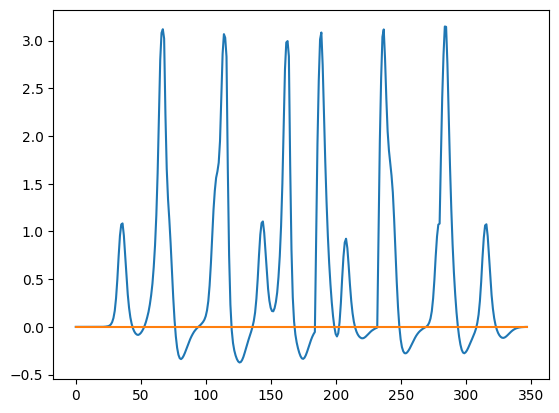

In [8]:
pars = {
    'x' : np.array([-radius_deg,radius_deg,3]),
    'y' : np.array([-radius_deg,radius_deg,3]), 
    'sd' : np.array([10,1,2]),
    'baseline' : np.array([0.0, 0.0, 0.0, ]), 
    'amplitude' : np.array([10, 10, 10, ]),
    'hrf_delay' : np.array([1.0, 1.0, 1.0]),
    'hrf_dispersion' : np.array([1.0, 1.0, 1.0]),
}
import pandas as pd 
pars = pd.DataFrame(pars)
pars
a = model.predict(parameters=pars)
plt.plot(a.iloc[:,0])
plt.plot(a.iloc[:,1])

# CSS model

In [ ]:
# test cs

bounds       = {
    'x' : [-radius_deg, radius_deg], 
    'y' : [-radius_deg, radius_deg], 
    'exponent' :[.1, 3],
    'sd': [.1, radius_deg*1.5], 

    # ''
}
grid_points = 20
cp = {}

for k in data.keys():    
    tcp = cfc[k].fit_grid(
        x       = np.linspace(bounds['x'][0], bounds['x'][1], 10),
        y       = np.linspace(bounds['y'][0], bounds['y'][1], 10),
        sd      = np.linspace(bounds['sd'][0], 8, 5),
        exponent= np.array([0.9, 1.0, 1.1]),
        amplitude   = [1.0],
        baseline    = [0.0],
        use_correlation_cost = True, 
        hrf_delay = [6.0], 
        hrf_dispersion = [1.0],
        # **hrf_kwargs        
    )
    cp[k] = cfc[k].refine_baseline_and_amplitude(parameters=tcp, )
    cp[k]['r2'] = cfc[k].get_rsq(parameters=cp[k], )

    print(cp[k]['r2'].mean())
    print(cp[k]['r2'].max())

57

In [ ]:
iter = {}
for k in data.keys():

    grid_pars_full = cp[k].copy()
    amp_tiny = (grid_pars_full['amplitude']<0.01).to_numpy()
    grid_pars_full['amplitude'].iloc[amp_tiny] = 0.10
    # SPLIT INTO 10 BATCHES TO SAVE MEMORY
    n_splits = 10
    n_vx = cp[k].shape[0]
    split_size = n_vx // n_splits
    iter_pars_list = []
    r2_list = []
    for i_split in range(n_splits):
        print(f'Fitting split {i_split+1}/{n_splits}')
        if i_split == n_splits - 1:
            split_idx = np.arange(i_split*split_size, n_vx)
        else:
            split_idx = np.arange(i_split*split_size, (i_split+1)*split_size)
        split_idx = [i for i in split_idx if i < n_vx]
        grid_pars_split = grid_pars_full.iloc[split_idx, :].copy()
        tpsc = data[k].iloc[:, split_idx].copy()    
            
        tcf = ParameterFitter(
            csmodel, tpsc, model.paradigm,
            # memory_limit=666666666//10
            )
        # [1] -> quick iter
        iter_pars = tcf.fit(
            init_pars=grid_pars_split, 
            max_n_iterations=10,  
            learning_rate=0.01,
            fixed_pars={'hrf_dispersion':1.0, 'hrf_delay':6.0, 'exponent' : 1.0}
            )   
        tr2 = tcf.get_rsq(parameters=iter_pars)
        print(f'Pre refine m = {tr2.mean():.3f}')
        # -> then refine...
        iter_pars_split = tcf.refine_baseline_and_amplitude(
            parameters=iter_pars)
        tr2 = tcf.get_rsq(parameters=iter_pars_split)
        print(f'Post refine m = {tr2.mean():.3f}')
        bloop
        # [2] Now main fitting
        # iter_pars2 = tcf.fit(
        #     init_pars=iter_pars1, 
        #     max_n_iterations=500,  
        #     learning_rate=0.01,
        #     )  
        # # -> refine again
        # iter_pars2 = tcf.refine_baseline_and_amplitude(
        #     parameters=iter_pars2)
        # # -> one last quick run 
        # iter_pars_split = tcf.fit(
        #     init_pars=iter_pars2, 
        #     max_n_iterations=100,  
        #     learning_rate=0.01,
        #     )   
            
        r2 = tcf.get_rsq(parameters=iter_pars_split)
        r2_list.append(r2)     
        iter_pars_list.append(iter_pars_split)
    iter_pars = pd.concat(iter_pars_list, axis=0)
    r2 = np.concatenate(r2_list, axis=0) 
    print(iter_pars.shape)
    iter_pars['r2'] = r2
    iter[k] = iter_pars.copy()


/var/folders/01/hhsk37310zsgzgg1nhgs6rfm0000gn/T/ipykernel_52974/2439776691.py:6: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/var/folders/01/hhsk37310zsgzgg1nhgs6rfm0000gn/T/ipykernel_52974/2439776691.py:6: FutureWarning:

Setting an item

Fitting split 1/10
*** Fitting: ***
 * x
 * y
 * sd
 * baseline
 * amplitude
 * exponent
 * hrf_delay
*** Fixed Parameters: ***
 * hrf_dispersion
Number of problematic voxels (mask): 0
Number of voxels remaining (mask): 27714


Current R2: nan/Best R2: 0.10087:  50%|█████     | 5/10 [00:09<00:09,  1.85s/it]    


KeyboardInterrupt: 

In [53]:
grid_pars_split['exponent'].min()

0.9

# Gauss model 

In [5]:

bounds       = {
    'x' : [-radius_deg, radius_deg], 
    'y' : [-radius_deg, radius_deg], 
    'sd': [.1, radius_deg*1.5], 

    # ''
}
grid_points = 20
gp = {}
for k in data.keys():
    tpickle = f'hp01_prf_grid{k}_pybtopnosmooth.pkl'
    if os.path.exists(tpickle):
        with open(tpickle, 'rb') as f:
            gp[k]=pickle.load(f)
    else:
        tgp = cfg[k].fit_grid(
            x       = np.linspace(bounds['x'][0], bounds['x'][1], 15),
            y       = np.linspace(bounds['y'][0], bounds['y'][1], 15),
            sd      = np.linspace(bounds['sd'][0], 8, 10),
            amplitude   = [1.0],
            baseline    = [0.0],
            use_correlation_cost = True, 
            hrf_delay = [6.0], 
            hrf_dispersion = [1.0],
            # **hrf_kwargs        
        )
        gp[k] = cfg[k].refine_baseline_and_amplitude(parameters=tgp, )
        gp[k]['r2'] = cfg[k].get_rsq(parameters=gp[k], )
        with open(tpickle, 'wb') as f:
            pickle.dump(gp[k], f)

        print(gp[k]['r2'].mean())
        print(gp[k]['r2'].max())

In [9]:
gp = {}
for k in data.keys():
    for k2 in ['afni', 'fsl', 'pyb']:
        tpickle = f'hp01_prf_grid{k}_{k2}topnosmooth.pkl'
        with open(tpickle, 'rb') as f:
            gp[f'{k}{k2}']=pickle.load(f)


In [78]:
mask = gp['pRFLEaf']['r2']>0.1
mask &= gp['pRFLEfs']['r2']>0.1
mask = mask.to_numpy()
dag_scatter(
    gp['pRFLEaf']['x'].iloc[mask], 
    gp['pRFLEfs']['x'].iloc[mask], 
    do_id_line=True, 
    do_line=True, 
    do_corr=True, 
)


KeyError: 'pRFLEaf'

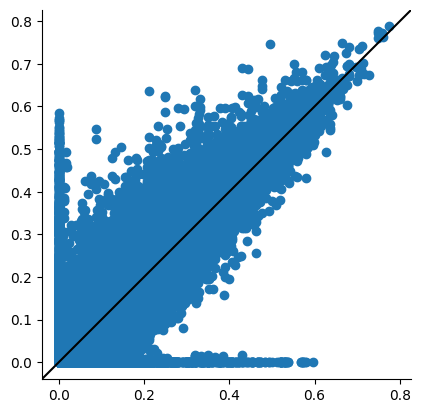

In [10]:
dag_scatter(
    gp['pRFLEafni']['r2'],
    gp['pRFLEpyb']['r2'], 
    do_id_line=True, 
)

-0.001244843

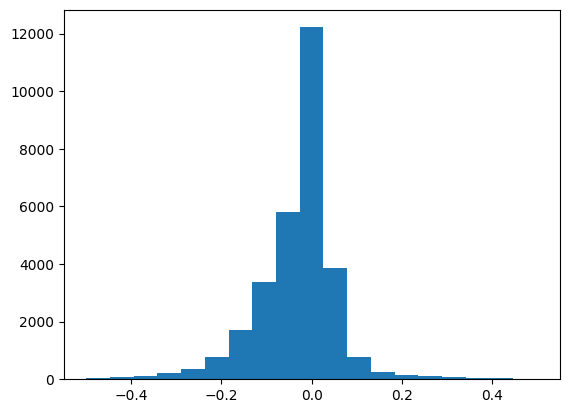

In [12]:
v1 = dag_load_roi(sub, 'b14_V', fs_dir, combine_matches=True)
plt.hist(
    (gp['pRFLEfsl']['r2']-gp['pRFLEpyb']['r2']).iloc[v1], 
    bins=np.linspace(-.5, .5, 20)
)
(gp['pRFLEafni']['r2']-gp['pRFLEpyb']['r2']).iloc[v1].median()

In [9]:
hrf_fixed = {
    'hrf_delay' : [6.0], 
    'hrf_dispersion': [1.0],
}
iter = {}
for k in data.keys():
    iter_file =  f'hp01_prf_iter{k}_pybdm30.pkl'
    if os.path.exists(iter_file):
        with open(iter_file, 'rb') as f:
            iter[k] = pickle.load(f).copy()
        print(f'found {k}')
    else:
        print(f'running {k}')
        grid_pars_full = gp[k].copy()
        # SPLIT INTO 10 BATCHES TO SAVE MEMORY
        n_splits = 5
        n_vx = gp[k].shape[0]
        split_size = n_vx // n_splits
        if True:
            # --- RANDOM SPLIT LOGIC ---
            # Generate a shuffled array of all indices
            indices = np.arange(n_vx)
            np.random.seed(0)
            np.random.shuffle(indices)
            # Split the shuffled indices into n_splits arrays
            index_splits = np.array_split(indices, n_splits)
            # ---------------------------
        else:
            indices = np.arange(n_vx)
            index_splits = np.array_split(indices, n_splits)
        with open('idx.pkl', 'wb') as f:
            pickle.dump(index_splits, f)
        iter_pars_list = []
        r2_list = []
        
        for i_split, split_idx in enumerate(index_splits):
            trpick = f'spybR{i_split}{k}.pkl'
            
            grid_pars_split = grid_pars_full.iloc[split_idx, :].copy()
            tpsc = data[k].iloc[:, split_idx].copy()    
                
            tcf = ParameterFitter(
                model, tpsc, model.paradigm,
                # memory_limit=666666666//10
                )
            if os.path.exists(trpick):
                with open(trpick, 'rb') as f:
                    iter_pars_split = pickle.load(f)
                r2 = tcf.get_rsq(parameters=iter_pars_split)
            else:
                print(f'Fitting split {i_split+1}/{n_splits}')

                # [1] -> quick iter
                iter_pars_split = tcf.fit(
                    init_pars=grid_pars_split, 
                    max_n_iterations=100,  
                    learning_rate=0.1,
                    )   
                iter_pars_split['temp_orig_idx'] = split_idx
                # -> then refine...
                # iter_pars_split = tcf.refine_baseline_and_amplitude(
                #     parameters=iter_pars1)   
                # [2] Now main fitting
                # iter_pars2 = tcf.fit(
                #     init_pars=iter_pars1, 
                #     max_n_iterations=500,  
                #     learning_rate=0.01,
                #     )  
                # # -> refine again
                # iter_pars2 = tcf.refine_baseline_and_amplitude(
                #     parameters=iter_pars2)
                # # -> one last quick run 
                # iter_pars_split = tcf.fit(
                #     init_pars=iter_pars2, 
                #     max_n_iterations=100,  
                #     learning_rate=0.01,
                #     )   
                with open(trpick, 'wb') as f:
                    pickle.dump(iter_pars_split, f)
            r2 = tcf.get_rsq(parameters=iter_pars_split)
            r2_list.append(r2)     
            iter_pars_list.append(iter_pars_split)
        # Combine all splits
        iter_pars_combined = pd.concat(iter_pars_list, axis=0)
        # SORT back to original voxel order and clean up
        iter_pars = iter_pars_combined.sort_values('temp_orig_idx').drop(columns=['temp_orig_idx'])
        r2 = np.concatenate(r2_list, axis=0) 
        print(iter_pars.shape)
        iter_pars['r2'] = r2
        iter[k] = iter_pars.copy()
        with open(iter_file, 'wb') as file:
            pickle.dump(iter[k], file)

found pRFLE
running pRFRE
Fitting split 1/5
*** Fitting: ***
 * x
 * y
 * sd
 * baseline
 * amplitude
 * hrf_delay
 * hrf_dispersion
Number of problematic voxels (mask): 0
Number of voxels remaining (mask): 55429


Current R2: 0.04777/Best R2: 0.04778: 100%|██████████| 100/100 [01:01<00:00,  1.63it/s]


Fitting split 2/5
*** Fitting: ***
 * x
 * y
 * sd
 * baseline
 * amplitude
 * hrf_delay
 * hrf_dispersion
Number of problematic voxels (mask): 0
Number of voxels remaining (mask): 55429


Current R2: 0.04771/Best R2: 0.04771: 100%|██████████| 100/100 [01:02<00:00,  1.59it/s]


Fitting split 3/5
*** Fitting: ***
 * x
 * y
 * sd
 * baseline
 * amplitude
 * hrf_delay
 * hrf_dispersion
Number of problematic voxels (mask): 0
Number of voxels remaining (mask): 55429


Current R2: 0.04854/Best R2: 0.04854: 100%|██████████| 100/100 [01:06<00:00,  1.51it/s]


Fitting split 4/5
*** Fitting: ***
 * x
 * y
 * sd
 * baseline
 * amplitude
 * hrf_delay
 * hrf_dispersion
Number of problematic voxels (mask): 0
Number of voxels remaining (mask): 55428


Current R2: 0.04832/Best R2: 0.04832: 100%|██████████| 100/100 [01:12<00:00,  1.38it/s]


Fitting split 5/5
*** Fitting: ***
 * x
 * y
 * sd
 * baseline
 * amplitude
 * hrf_delay
 * hrf_dispersion
Number of problematic voxels (mask): 0
Number of voxels remaining (mask): 55428


Current R2: 0.04817/Best R2: 0.04818: 100%|██████████| 100/100 [01:09<00:00,  1.43it/s]


(277143, 7)


array([240203,  17127, 270556, ..., 244626, 164802, 159743])

In [17]:
split_idx

array([240203,  17127, 270556, ..., 244626, 164802, 159743])

In [43]:
with open(f'hp01_prf_iterpRFLE_pybtopnosmooth', 'rb') as file:
    itp = pickle.load(file)

In [23]:
iter['pRFLE'] - iter['pRFRE']

parameter,x,y,sd,baseline,amplitude,hrf_delay,hrf_dispersion,r2
source,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
277138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
hrf_fixed = {
    'hrf_delay' : [6.0], 
    'hrf_dispersion': [1.0],
}
iter = {}
for k in data.keys():
    
    with open(f'hp01_prf_iter{k}_afnitopnosmoothQ.pkl', 'rb') as file:
        iter[k] = pickle.load(file)
    iter[k]['r2']

# PRF OBJ

In [14]:
from prf_obj import *
prf_objs = []
prf_ids = []
for k in data.keys():
    prf_objs.append(PrfObj(
        pd_params=iter[k], 
        bcoder_model=model, 
        data=data[k], 
        model='gauss', 
    )
    )
    prf_ids.append(k)
po = PrfMulti(prf_objs, prf_ids)

In [15]:
po.add_prf_diff('pRFLE', 'pRFRE')

2026-02-03 17:23:29.208127: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2026-02-03 17:23:29.208172: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2026-02-03 17:23:29.208185: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2026-02-03 17:23:29.208199: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2026-02-03 17:23:29.208207: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2026-02-03 17:23:29.220603: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


(1, 348, 1) (32, 1)


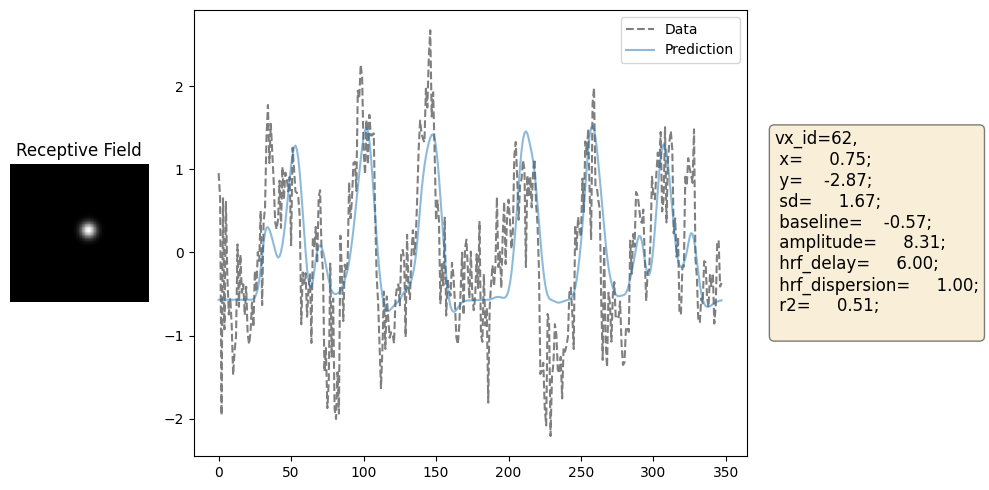

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [16]:
%matplotlib inline
a =po.po['pRFLE'].prf_plotter(62, do_str=True)
plt.show()
plt.figure()

# Surface plotting

In [17]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from dpu_mini.mesh_dash import dag_mesh_pickle, MeshDash

In [18]:
sub = 'sub-hp01'
fs_dir = '/Users/marcusdaghlian/projects/dp-clean-link/240522NG/hypot/derivatives/freesurfer'
fs = MeshDash(
    sub, 
    fs_dir=fs_dir,
    output_dir='z_dash',
    )
fs.web_get_ready()
for k in po.pd_params.keys():
    col_kwargs = {
    }
    if 'pol' in k:
        col_kwargs['vmin'] = -np.pi
        col_kwargs['vmax'] = np.pi
        col_kwargs['cmap'] = 'marco_pol'
    elif 'ecc' in k:
        col_kwargs['vmin'] = 0
        col_kwargs['vmax'] = radius_deg
        col_kwargs['cmap'] = 'jet'
    elif 'r2' in k:
        col_kwargs['vmin'] = 0
        col_kwargs['vmax'] = 1.0
        col_kwargs['cmap'] = 'plasma'
    elif ('x' in k) or ('y' in k):
        col_kwargs['vmin'] = -10
        col_kwargs['vmax'] = 10
        col_kwargs['cmap'] = 'RdBu_r'
    ktask = k.split('-')[0]
    fs.web_add_vx_col(
        data=po.pd_params[k],
        data4mask=po.pd_params[f'{ktask}-r2'],
        vx_col_name=k.replace('-','_'), 
        rsq_thresh=0.1, 
        **col_kwargs
    )

for k in po.po['diff_pRFLE_pRFRE'].pd_params.keys():
    fs.web_add_vx_col(
        data=po.po['diff_pRFLE_pRFRE'].pd_params[f'{k}'],
        # data4mask=,
        vx_col_name=f"diff_{k.replace('-','_')}", 
        cmap='RdBu_r',
        # **col_kwargs
    )
# Other cool things....
# you can add ROIs

# fs.web_add_roi(roi_list='V1')
roi_list = dag_roi_list_expand(sub, 'b14_', fs_dir)[1:]
fs.web_add_roi(roi_list=roi_list)
# You can also add conditional functions to do plotting. 
# For example if you have a function to plot the timeseries put that here 
def my_plot_function(vertex_id):
    fig = plt.figure()
    
    # Do some plotting based on the vertex...
    return fig

# We have already made one here -> 

fs.web_add_mpl_fig_maker(
    mpl_func=po.po['pRFLE'].prf_plotter, # my_plot_function
    mpl_key='pRFLE',
    mpl_kwargs={'do_str':True},
) # you can add more than one...
fs.web_add_mpl_fig_maker(
    mpl_func=po.po['pRFRE'].prf_plotter, # my_plot_function
    mpl_key='pRFRE',
    mpl_kwargs={'do_str':True},
)
# Other cool things....
# you can add ROIs
# fs.web_add_roi(roi_list='V1')

# We have already made one here -> 


Using fs dir = /Users/marcusdaghlian/projects/dp-clean-link/240522NG/hypot/derivatives/freesurfer
Adding offset to mesh...
Adding offset to mesh...
Adding offset to mesh...
Adding offset to mesh...
Adding offset to mesh...
Adding offset to mesh...


Just using undersurface file..
No vx to mask
No vx to mask
*** USING BASIC RSQ THRESHOLD ***
Make RGB time = 0.011605024337768555


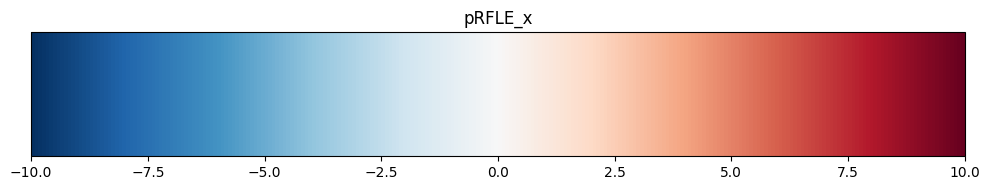

COL DROPDOWN CALLBACK
THRESH TEXT CALLBACK

0
CLEAR LOWER CALLBACK
CLEAR UPPER CALLBACK
INFLATE CALLBACK
ROI CALLBACK
Toggled OFF
Inflate time = 0.11137628555297852
COL DROPDOWN CALLBACKTHRESH TEXT CALLBACK

0

CLEAR LOWER CALLBACK
CLEAR UPPER CALLBACK
INFLATE CALLBACK
ROI CALLBACK
Toggled OFF
Inflate time = 0.43808984756469727
Toggled OFF
Toggled OFF
COL DROPDOWN CALLBACK
*** USING BASIC RSQ THRESHOLD ***
Make RGB time = 0.048252105712890625
Vertex update time = 0.0011782646179199219
COLOR CHAIN
CMAP PREVENT
Toggled OFF
Toggled OFF
INFLATE CALLBACK
Inflate time = 0.025333166122436523
Toggled OFF
COL DROPDOWN CALLBACK
*** USING BASIC RSQ THRESHOLD ***
Make RGB time = 0.03155112266540527
Vertex update time = 0.0011799335479736328
COLOR CHAIN
CMAP PREVENT
Toggled OFF
COL DROPDOWN CALLBACK
*** USING BASIC RSQ THRESHOLD ***
Make RGB time = 0.02885890007019043
Vertex update time = 0.001519918441772461
COLOR CHAIN
CMAP PREVENT
Toggled OFF
*** USING BASIC RSQ THRESHOLD ***
COLOR CHAIN
*** USI

/Users/marcusdaghlian/programs/braincoder_bprf/braincoder/utils/visualize.py:51: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



Clicked too soon...
CLICK CALLBACK
[0.77777778 0.77777778 0.77777778 1.        ]
Fig time = 0.19554805755615234
time = 0.1959841251373291
Clicked too soon...
CLICK CALLBACK
[0.77777778 0.77777778 0.77777778 1.        ]
Fig time = 0.18824315071105957
time = 0.1887660026550293
Clicked too soon...
CLICK CALLBACK
[0.77777778 0.77777778 0.77777778 1.        ]
Fig time = 0.18178629875183105
time = 0.18262910842895508
Clicked too soon...
CLICK CALLBACK
[1.         0.90468187 0.         1.        ]
Fig time = 0.18700814247131348
time = 0.1873941421508789
Clicked too soon...
CLICK CALLBACK
[0.99664933 0.0256228  0.04690943 1.        ]
Fig time = 0.18182587623596191
time = 0.18234610557556152
Clicked too soon...
CLICK CALLBACK
[1.         0.50260104 0.         1.        ]
Fig time = 0.18770980834960938
time = 0.18825101852416992
Clicked too soon...
CLICK CALLBACK
[0.         0.15935143 1.         1.        ]
Fig time = 0.18551898002624512
time = 0.18610310554504395
Clicked too soon...
CLICK CALL

In [21]:
app = fs.web_launch_with_dash() # change to exciting to use silly fonts...
# Open the app in a browser (or in the notebook)
app.run(mode='external', host='127.0.0.1', port=8001, debug=False, use_reloader=False) 
# Go to localhost:8000 in your browser to see the app.

In [49]:
po.pd_params.keys()

Index(['pRFLE-x', 'pRFLE-y', 'pRFLE-sd', 'pRFLE-baseline', 'pRFLE-amplitude',
       'pRFLE-hrf_delay', 'pRFLE-hrf_dispersion', 'pRFLE-r2', 'pRFLE-ecc',
       'pRFLE-pol', 'pRFRE-x', 'pRFRE-y', 'pRFRE-sd', 'pRFRE-baseline',
       'pRFRE-amplitude', 'pRFRE-hrf_delay', 'pRFRE-hrf_dispersion',
       'pRFRE-r2', 'pRFRE-ecc', 'pRFRE-pol'],
      dtype='object')

[2026-02-02 15:45:20,061] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/marcusdaghlian/miniforge3/envs/tf_gpu001/lib/python3.10/site-packages/pandas/core/computation/scope.py", line 231, in resolve
    return self.resolvers[key]
  File "/Users/marcusdaghlian/miniforge3/envs/tf_gpu001/lib/python3.10/collections/__init__.py", line 986, in __getitem__
    return self.__missing__(key)            # support subclasses that define __missing__
  File "/Users/marcusdaghlian/miniforge3/envs/tf_gpu001/lib/python3.10/collections/__init__.py", line 978, in __missing__
    raise KeyError(key)
KeyError: 'pRFLE'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/marcusdaghlian/miniforge3/envs/tf_gpu001/lib/python3.10/site-packages/pandas/core/computation/scope.py", line 242, in resolve
    return self.temps[key]
KeyError: 'pRFLE'

The above exception was the direct cause o

THRESH TEXT CALLBACK
pRFLE-x>0.1
17
*** USING SMART THRESHOLD ***
CLICK CALLBACK
[0.77777778 0.77777778 0.77777778 1.        ]
Fig time = 0.4327981472015381
time = 0.4359149932861328
Clicked too soon...


[2026-02-02 15:45:28,568] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/marcusdaghlian/miniforge3/envs/tf_gpu001/lib/python3.10/site-packages/pandas/core/computation/scope.py", line 231, in resolve
    return self.resolvers[key]
  File "/Users/marcusdaghlian/miniforge3/envs/tf_gpu001/lib/python3.10/collections/__init__.py", line 986, in __getitem__
    return self.__missing__(key)            # support subclasses that define __missing__
  File "/Users/marcusdaghlian/miniforge3/envs/tf_gpu001/lib/python3.10/collections/__init__.py", line 978, in __missing__
    raise KeyError(key)
KeyError: 'pRFLE'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/marcusdaghlian/miniforge3/envs/tf_gpu001/lib/python3.10/site-packages/pandas/core/computation/scope.py", line 242, in resolve
    return self.temps[key]
KeyError: 'pRFLE'

The above exception was the direct cause o

RSQ THRESH CALLBACK
*** USING SMART THRESHOLD ***
THRESH TEXT CALLBACK
pRFLE-x>0.1
18


[2026-02-02 15:45:38,342] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/marcusdaghlian/miniforge3/envs/tf_gpu001/lib/python3.10/site-packages/pandas/core/computation/scope.py", line 231, in resolve
    return self.resolvers[key]
  File "/Users/marcusdaghlian/miniforge3/envs/tf_gpu001/lib/python3.10/collections/__init__.py", line 986, in __getitem__
    return self.__missing__(key)            # support subclasses that define __missing__
  File "/Users/marcusdaghlian/miniforge3/envs/tf_gpu001/lib/python3.10/collections/__init__.py", line 978, in __missing__
    raise KeyError(key)
KeyError: 'pRFLE'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/marcusdaghlian/miniforge3/envs/tf_gpu001/lib/python3.10/site-packages/pandas/core/computation/scope.py", line 242, in resolve
    return self.temps[key]
KeyError: 'pRFLE'

The above exception was the direct cause o

THRESH TEXT CALLBACK
(pRFLE-x>0.1)
19
*** USING SMART THRESHOLD ***
CLICK CALLBACK
[0.99329865 0.0512456  0.09381886 1.        ]
Fig time = 0.5459630489349365
time = 0.5476357936859131
Clicked too soon...


[2026-02-02 15:46:06,433] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/marcusdaghlian/miniforge3/envs/tf_gpu001/lib/python3.10/site-packages/pandas/core/computation/scope.py", line 231, in resolve
    return self.resolvers[key]
  File "/Users/marcusdaghlian/miniforge3/envs/tf_gpu001/lib/python3.10/collections/__init__.py", line 986, in __getitem__
    return self.__missing__(key)            # support subclasses that define __missing__
  File "/Users/marcusdaghlian/miniforge3/envs/tf_gpu001/lib/python3.10/collections/__init__.py", line 978, in __missing__
    raise KeyError(key)
KeyError: 'pRFLE'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/marcusdaghlian/miniforge3/envs/tf_gpu001/lib/python3.10/site-packages/pandas/core/computation/scope.py", line 242, in resolve
    return self.temps[key]
KeyError: 'pRFLE'

The above exception was the direct cause o

COL DROPDOWN CALLBACK
*** USING SMART THRESHOLD ***
CLICK CALLBACK
[0.         0.13596639 1.         1.        ]
Fig time = 0.5305299758911133
time = 0.5315940380096436
Clicked too soon...


[2026-02-02 15:46:21,804] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/marcusdaghlian/miniforge3/envs/tf_gpu001/lib/python3.10/site-packages/pandas/core/computation/scope.py", line 231, in resolve
    return self.resolvers[key]
  File "/Users/marcusdaghlian/miniforge3/envs/tf_gpu001/lib/python3.10/collections/__init__.py", line 986, in __getitem__
    return self.__missing__(key)            # support subclasses that define __missing__
  File "/Users/marcusdaghlian/miniforge3/envs/tf_gpu001/lib/python3.10/collections/__init__.py", line 978, in __missing__
    raise KeyError(key)
KeyError: 'pRFLE'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/marcusdaghlian/miniforge3/envs/tf_gpu001/lib/python3.10/site-packages/pandas/core/computation/scope.py", line 242, in resolve
    return self.temps[key]
KeyError: 'pRFLE'

The above exception was the direct cause o

COL DROPDOWN CALLBACK
*** USING SMART THRESHOLD ***
CLEAR LOWER CALLBACK
THRESH TEXT CALLBACK

0
*** USING BASIC RSQ THRESHOLD ***
CLEAR UPPER CALLBACK
INFLATE CALLBACK
ROI CALLBACK
Toggled OFF
Inflate time = 0.07786917686462402
Make RGB time = 0.20804309844970703
Vertex update time = 0.004316091537475586
COLOR CHAIN
COL DROPDOWN CALLBACK
*** USING BASIC RSQ THRESHOLD ***
Make RGB time = 0.028908967971801758
Vertex update time = 0.001935720443725586
COLOR CHAIN
CMAP PREVENT
Toggled OFF


[2026-02-02 15:46:50,468] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/marcusdaghlian/miniforge3/envs/tf_gpu001/lib/python3.10/site-packages/pandas/core/computation/scope.py", line 231, in resolve
    return self.resolvers[key]
  File "/Users/marcusdaghlian/miniforge3/envs/tf_gpu001/lib/python3.10/collections/__init__.py", line 986, in __getitem__
    return self.__missing__(key)            # support subclasses that define __missing__
  File "/Users/marcusdaghlian/miniforge3/envs/tf_gpu001/lib/python3.10/collections/__init__.py", line 978, in __missing__
    raise KeyError(key)
KeyError: 'pRFRE'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/marcusdaghlian/miniforge3/envs/tf_gpu001/lib/python3.10/site-packages/pandas/core/computation/scope.py", line 242, in resolve
    return self.temps[key]
KeyError: 'pRFRE'

The above exception was the direct cause o

THRESH TEXT CALLBACK
pRFRE-ecc>0.1
1
*** USING SMART THRESHOLD ***
THRESH TEXT CALLBACK
pRFRE-ecc>0.1
2
THRESH TEXT CALLBACK
pRFRE-ecc>0.1
3


[2026-02-02 15:47:19,657] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/marcusdaghlian/miniforge3/envs/tf_gpu001/lib/python3.10/site-packages/pandas/core/computation/scope.py", line 231, in resolve
    return self.resolvers[key]
  File "/Users/marcusdaghlian/miniforge3/envs/tf_gpu001/lib/python3.10/collections/__init__.py", line 986, in __getitem__
    return self.__missing__(key)            # support subclasses that define __missing__
  File "/Users/marcusdaghlian/miniforge3/envs/tf_gpu001/lib/python3.10/collections/__init__.py", line 978, in __missing__
    raise KeyError(key)
KeyError: 'pRFRE'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/marcusdaghlian/miniforge3/envs/tf_gpu001/lib/python3.10/site-packages/pandas/core/computation/scope.py", line 242, in resolve
    return self.temps[key]
KeyError: 'pRFRE'

The above exception was the direct cause o

THRESH TEXT CALLBACK
pRFRE-ecc<0.1
4
*** USING SMART THRESHOLD ***
THRESH TEXT CALLBACK
pRFRE-ecc<0.1
5


[2026-02-02 15:47:29,764] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/marcusdaghlian/miniforge3/envs/tf_gpu001/lib/python3.10/site-packages/pandas/core/computation/scope.py", line 231, in resolve
    return self.resolvers[key]
  File "/Users/marcusdaghlian/miniforge3/envs/tf_gpu001/lib/python3.10/collections/__init__.py", line 986, in __getitem__
    return self.__missing__(key)            # support subclasses that define __missing__
  File "/Users/marcusdaghlian/miniforge3/envs/tf_gpu001/lib/python3.10/collections/__init__.py", line 978, in __missing__
    raise KeyError(key)
KeyError: 'pRFRE'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/marcusdaghlian/miniforge3/envs/tf_gpu001/lib/python3.10/site-packages/pandas/core/computation/scope.py", line 242, in resolve
    return self.temps[key]
KeyError: 'pRFRE'

The above exception was the direct cause o

VMAX CALLBACK
*** USING SMART THRESHOLD ***
INFLATE CALLBACK
Inflate time = 0.026118040084838867
INFLATE CALLBACK
Inflate time = 0.02678513526916504


[2026-02-02 15:47:55,389] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/marcusdaghlian/miniforge3/envs/tf_gpu001/lib/python3.10/site-packages/pandas/core/computation/scope.py", line 231, in resolve
    return self.resolvers[key]
  File "/Users/marcusdaghlian/miniforge3/envs/tf_gpu001/lib/python3.10/collections/__init__.py", line 986, in __getitem__
    return self.__missing__(key)            # support subclasses that define __missing__
  File "/Users/marcusdaghlian/miniforge3/envs/tf_gpu001/lib/python3.10/collections/__init__.py", line 978, in __missing__
    raise KeyError(key)
KeyError: 'pRFRE'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/marcusdaghlian/miniforge3/envs/tf_gpu001/lib/python3.10/site-packages/pandas/core/computation/scope.py", line 242, in resolve
    return self.temps[key]
KeyError: 'pRFRE'

The above exception was the direct cause o

RSQ THRESH CALLBACK
*** USING SMART THRESHOLD ***
Toggled OFF
Toggled OFF
Toggled OFF
THRESH TEXT CALLBACK

6
*** USING BASIC RSQ THRESHOLD ***
Make RGB time = 0.05054211616516113
Vertex update time = 0.00832676887512207
COLOR CHAIN
Toggled OFF
COL DROPDOWN CALLBACK
*** USING BASIC RSQ THRESHOLD ***
Make RGB time = 0.03118610382080078
Vertex update time = 0.002646923065185547
COLOR CHAIN
CMAP PREVENT
Toggled OFF
RSQ THRESH CALLBACK
*** USING BASIC RSQ THRESHOLD ***
Make RGB time = 0.02683424949645996
Vertex update time = 0.0038509368896484375
COLOR CHAIN
Toggled OFF
COL DROPDOWN CALLBACK
*** USING BASIC RSQ THRESHOLD ***
Make RGB time = 0.027130842208862305
Vertex update time = 0.0040318965911865234
COLOR CHAIN
CMAP PREVENT
Toggled OFF
Toggled OFF
COL DROPDOWN CALLBACK
*** USING BASIC RSQ THRESHOLD ***
Make RGB time = 0.024446964263916016
Vertex update time = 0.002683877944946289
COLOR CHAIN
CMAP PREVENT
VMAX CALLBACK
*** USING BASIC RSQ THRESHOLD ***
Make RGB time = 0.0265438556671142

/Users/marcusdaghlian/programs/braincoder_bprf/braincoder/utils/visualize.py:51: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



Fig time = 0.5434768199920654
time = 0.5441803932189941
Clicked too soon...
CLICK CALLBACK
[0.77777778 0.77777778 0.77777778 1.        ]
Fig time = 0.7618868350982666
time = 0.7861509323120117
Clicked too soon...
INFLATE CALLBACK
Inflate time = 0.030752897262573242
CLICK CALLBACK
[0.         0.87478992 1.         1.        ]
Fig time = 0.46254706382751465
time = 0.4631340503692627
Clicked too soon...
ROI CALLBACK
ROI CALLBACK
ROI CALLBACK
CLICK CALLBACK
[0.         0.17114846 1.         1.        ]
Fig time = 0.4392211437225342
time = 0.4482121467590332
Clicked too soon...
Clicked too soon...
CLICK CALLBACK
[0.         0.80371396 0.60588235 1.        ]
Fig time = 1.1890208721160889
time = 1.189673900604248
Clicked too soon...
RSQ THRESH CALLBACK
*** USING BASIC RSQ THRESHOLD ***
Make RGB time = 0.02891993522644043
Vertex update time = 0.0016050338745117188
COLOR CHAIN
*** USING BASIC RSQ THRESHOLD ***
CLICK CALLBACK
[0.40784314 0.40784314 0.40784314 1.        ]
Fig time = 0.29812312126

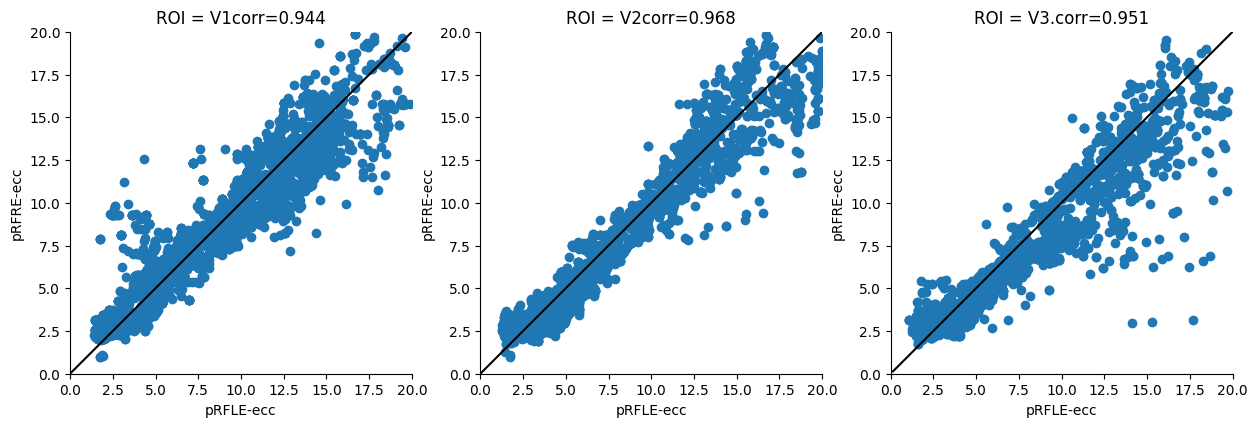

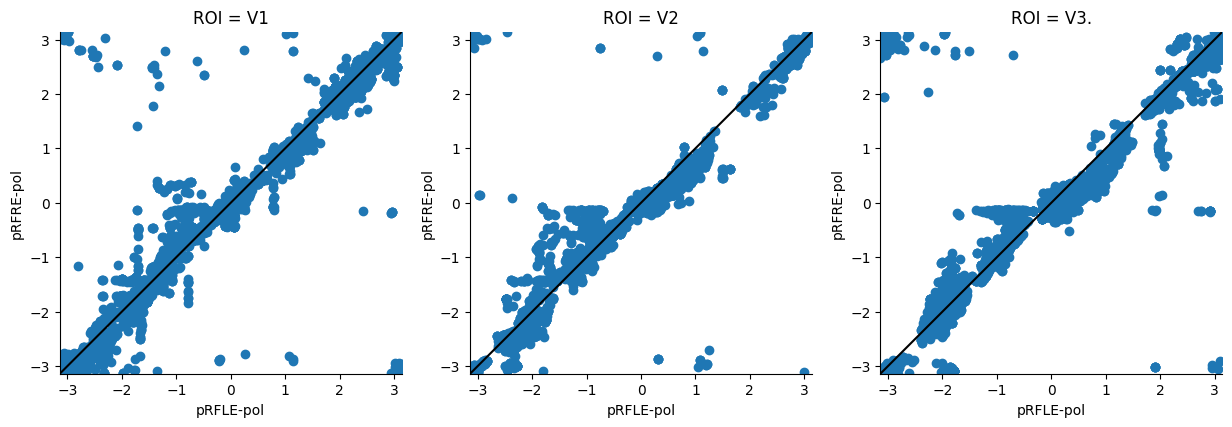

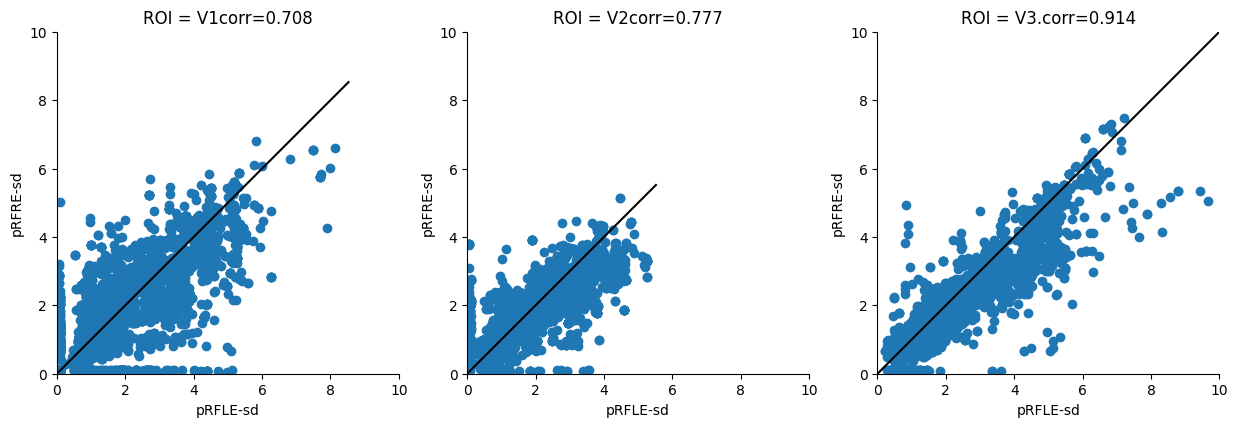

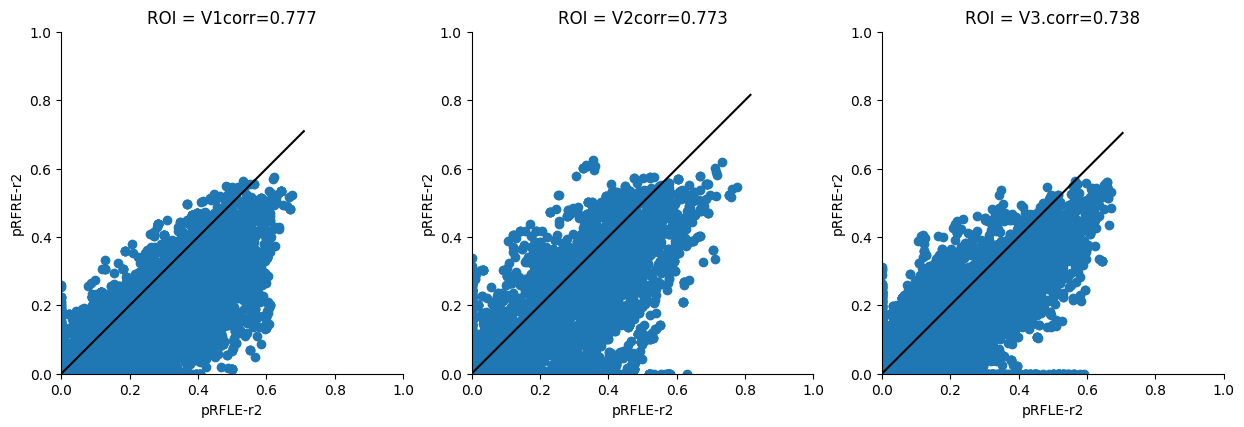

COL DROPDOWN CALLBACKTHRESH TEXT CALLBACK

0

*** USING BASIC RSQ THRESHOLD ***
CLEAR LOWER CALLBACK
CLEAR UPPER CALLBACK
INFLATE CALLBACK
ROI CALLBACK
Toggled OFF
Inflate time = 1.0488080978393555
Make RGB time = 1.159651756286621
Vertex update time = 0.0035848617553710938
CMAP PREVENT
COLOR CHAIN
Toggled OFF
Toggled OFF
Toggled OFF
COL DROPDOWN CALLBACK
*** USING BASIC RSQ THRESHOLD ***
Make RGB time = 0.040242910385131836
Vertex update time = 0.0025110244750976562
COLOR CHAIN
CMAP PREVENT
Toggled OFF
COL DROPDOWN CALLBACK
*** USING BASIC RSQ THRESHOLD ***
Make RGB time = 0.02764105796813965
Vertex update time = 0.002157926559448242
COLOR CHAIN
CMAP PREVENT
Toggled OFF
Toggled OFF
Toggled OFF
Toggled OFF
Toggled OFF
COL DROPDOWN CALLBACK
*** USING BASIC RSQ THRESHOLD ***
Make RGB time = 0.04163718223571777
Vertex update time = 0.0036542415618896484
COLOR CHAIN
CMAP PREVENT
Toggled OFF
Toggled OFF
Toggled OFF
Toggled OFF
Toggled OFF
CMAP CALLBACK
*** USING BASIC RSQ THRESHOLD ***
Make

/Users/marcusdaghlian/programs/braincoder_bprf/braincoder/utils/visualize.py:51: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



VX INDEX CALLBACK
[0.33578431 0.66919454 0.         1.        ]
Fig time = 0.19719815254211426
time = 0.19756102561950684
VX INDEX CALLBACK
[0.         0.62333989 0.24371396 1.        ]
Fig time = 0.2091820240020752
time = 0.20982623100280762
VX INDEX CALLBACK
[0.         0.73156433 0.46101499 1.        ]
Fig time = 0.19942903518676758
time = 0.19979381561279297
VX INDEX CALLBACK
[0.         0.87586358 0.75074971 1.        ]
Fig time = 0.18809890747070312
time = 0.1885988712310791
VX INDEX CALLBACK
[0.         0.91193839 0.82318339 1.        ]
Fig time = 0.19179487228393555
time = 0.19229602813720703
VX INDEX CALLBACK
[0.         0.69887955 1.         1.        ]
Fig time = 0.19811391830444336
time = 0.1984729766845703
CLICK CALLBACK
[0.         0.55119027 0.0988466  1.        ]
Fig time = 0.7212340831756592
time = 0.721796989440918
Clicked too soon...
CLICK CALLBACK
[0.77777778 0.77777778 0.77777778 1.        ]
Fig time = 0.24402976036071777
time = 0.2446603775024414
Clicked too soon.

In [77]:
# Compare Left & Right 
# [1] ecc 
roi_list = ['V1', 'V2', 'V3.',] # 'hV4', "LO", "VO"]
fig, axs = plt.subplots(1,len(roi_list), figsize=(len(roi_list)*5.0,5))
for ir,r in enumerate(roi_list):
    mask = dag_load_roi(sub, f'b14_{r}', fs_dir, combine_matches=True)
    axs[ir].set_title(f'ROI = {r}')
    po.scatter(
        f'pRFLE-ecc', 'pRFRE-ecc', 
        th={
            'all-min-r2':.1, 
            'all-max-ecc' : 20.0,
            'roi': mask, 
        }, 
        ax=axs[ir], do_corr=True, do_id_line=True, 
    )
    # axs[ir].set_aspect('square')
    axs[ir].set_xlim(0,20)
    axs[ir].set_ylim(0,20)

fig, axs = plt.subplots(1,len(roi_list), figsize=(len(roi_list)*5.0,5))
for ir,r in enumerate(roi_list):
    mask = dag_load_roi(sub, f'b14_{r}', fs_dir, combine_matches=True)
    axs[ir].set_title(f'ROI = {r}')
    po.scatter(
        f'pRFLE-pol', 'pRFRE-pol', 
        th={
            'all-min-r2':.1, 
            'all-max-ecc' : 20.0,
            'roi': mask, 

        }, 
        ax=axs[ir], do_corr=False, do_id_line=True, 
    )
    # axs[ir].set_aspect('square')
    axs[ir].set_xlim(-np.pi,np.pi)
    axs[ir].set_ylim(-np.pi,np.pi)



fig, axs = plt.subplots(1,len(roi_list), figsize=(len(roi_list)*5.0,5))
for ir,r in enumerate(roi_list):
    mask = dag_load_roi(sub, f'b14_{r}', fs_dir, combine_matches=True)
    axs[ir].set_title(f'ROI = {r}')
    po.scatter(
        f'pRFLE-sd', 'pRFRE-sd', 
        th={
            'all-min-r2':.1, 
            'all-max-ecc' : 20.0,
            'roi': mask, 

        }, 
        ax=axs[ir], do_corr=True, do_id_line=True, 
    )
    # axs[ir].set_aspect('square')
    axs[ir].set_xlim(0,10)
    axs[ir].set_ylim(0,10)



fig, axs = plt.subplots(1,len(roi_list), figsize=(len(roi_list)*5.0,5))
for ir,r in enumerate(roi_list):
    mask = dag_load_roi(sub, f'b14_{r}', fs_dir, combine_matches=True)
    axs[ir].set_title(f'ROI = {r}')
    po.scatter(
        f'pRFLE-r2', 'pRFRE-r2', 
        th={
            'roi': mask, 

        }, 
        ax=axs[ir], do_corr=True, do_id_line=True, 
    )
    # axs[ir].set_aspect('square')
    axs[ir].set_xlim(0,1)
    axs[ir].set_ylim(0,1)


In [95]:

bounds       = {
    'x' : [-20, 20], 
    'y' : [-20, 20], 
    'sd': [.1, 10], 

    # ''
}
grid_points = 20

# default delay=6, disp = 1.
# min_hrf_delay=3., max_hrf_delay=7.0,
#              min_dispersion=0.3, max_dispersion=2.0):
# hrf_kwargs = {
#     'hrf_delay' : np.linspace(3.1,6.5,5), # np.array([1.0]), 
#     'hrf_dispersion' :np.array([1.0]), # np.linspace(0.4,1.9,5), #np.array([1.0]), 
# }
grid_pars = cfitter.fit_grid(
    x       = np.linspace(bounds['x'][0], bounds['x'][1], 20),
    y       = np.linspace(bounds['y'][0], bounds['y'][1], 20),
    sd      = np.linspace(bounds['sd'][0], bounds['sd'][1], 10),
    amplitude   = [1.0],
    baseline    = [0.0],
    use_correlation_cost = True, 
    # **hrf_kwargs
    
)
grid_pars = cfitter.refine_baseline_and_amplitude(grid_pars, ) #l2_alpha=1.0) 
grid_preds = cfitter.get_predictions(parameters=grid_pars)

r2 = cfitter.get_rsq(parameters=grid_pars)
print(r2.mean())
print(r2.max())

Working with chunk size of 63
Using correlation cost!


100%|██████████| 64/64 [00:09<00:00,  6.54it/s]


0.20199248
0.7686638


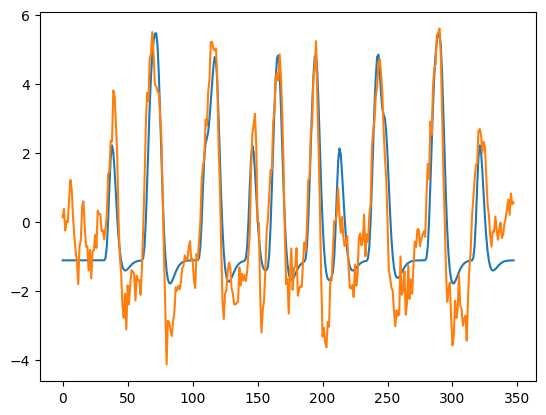

In [96]:
plt.plot(grid_preds.iloc[:,r2.argmax()])
plt.plot(v1_ts.iloc[:,r2.argmax()])

In [74]:
ecc, pol = dag_coord_convert(
    grid_pars['x'], grid_pars['y'], 'pol2cart'
)

In [98]:
iter_pars = cfitter.fit(
    init_pars=grid_pars, 
    learning_rate=0.01,
    max_n_iterations=500,
)

*** Fitting: ***
 * x
 * y
 * sd
 * baseline
 * amplitude
Number of problematic voxels (mask): 0
Number of voxels remaining (mask): 30095


Current R2: 0.24517/Best R2: 0.24575:   7%|▋         | 33/500 [00:44<10:24,  1.34s/it]


KeyboardInterrupt: 

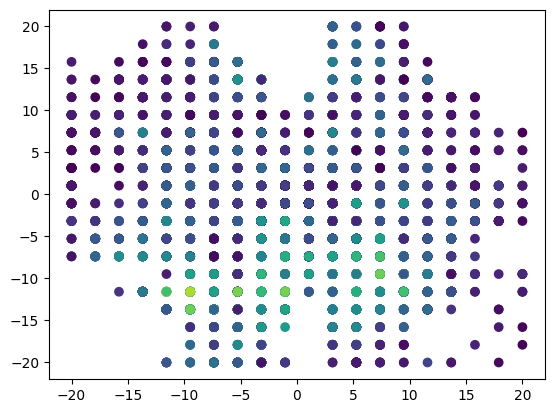

In [87]:
r2 = cfitter.get_rsq(parameters=grid_pars)
r2_mask = (r2>0.3).to_numpy()
plt.scatter(
    grid_pars['x'].iloc[r2_mask], 
    grid_pars['y'].iloc[r2_mask],
    c=r2.iloc[r2_mask], 
)

In [88]:
r2

source
0         0.306836
1         0.305684
2         0.333899
3         0.347353
4         0.352737
            ...   
277089    0.270568
277107    0.400720
277116    0.066342
277118    0.313597
277142    0.337954
Name: r2, Length: 30095, dtype: float32

In [22]:
(r2>0.1).sum()

953

In [109]:
from dpu_mini.mesh_maker import *
m = GenMeshMaker(
    sub='sub-hp01', fs_dir=fs_dir,
)

Using fs dir = /Users/marcusdaghlian/projects/dp-clean-link/240522NG/hypot/derivatives/freesurfer
Adding offset to mesh...
Adding offset to mesh...
Adding offset to mesh...
Adding offset to mesh...
Adding offset to mesh...
Adding offset to mesh...


jet exists
Saving ecc_pRFLE in /Users/marcusdaghlian/projects/dp-clean-link/240522NG/hypot/derivatives/freesurfer/sub-hp01/surf/custom
marco_pol exists
Saving pol_pRFLE in /Users/marcusdaghlian/projects/dp-clean-link/240522NG/hypot/derivatives/freesurfer/sub-hp01/surf/custom
viridis exists
Saving r2_pRFLE in /Users/marcusdaghlian/projects/dp-clean-link/240522NG/hypot/derivatives/freesurfer/sub-hp01/surf/custom
jet exists
Saving ecc_pRFRE in /Users/marcusdaghlian/projects/dp-clean-link/240522NG/hypot/derivatives/freesurfer/sub-hp01/surf/custom
marco_pol exists
Saving pol_pRFRE in /Users/marcusdaghlian/projects/dp-clean-link/240522NG/hypot/derivatives/freesurfer/sub-hp01/surf/custom
viridis exists
Saving r2_pRFRE in /Users/marcusdaghlian/projects/dp-clean-link/240522NG/hypot/derivatives/freesurfer/sub-hp01/surf/custom


<Figure size 640x480 with 0 Axes>

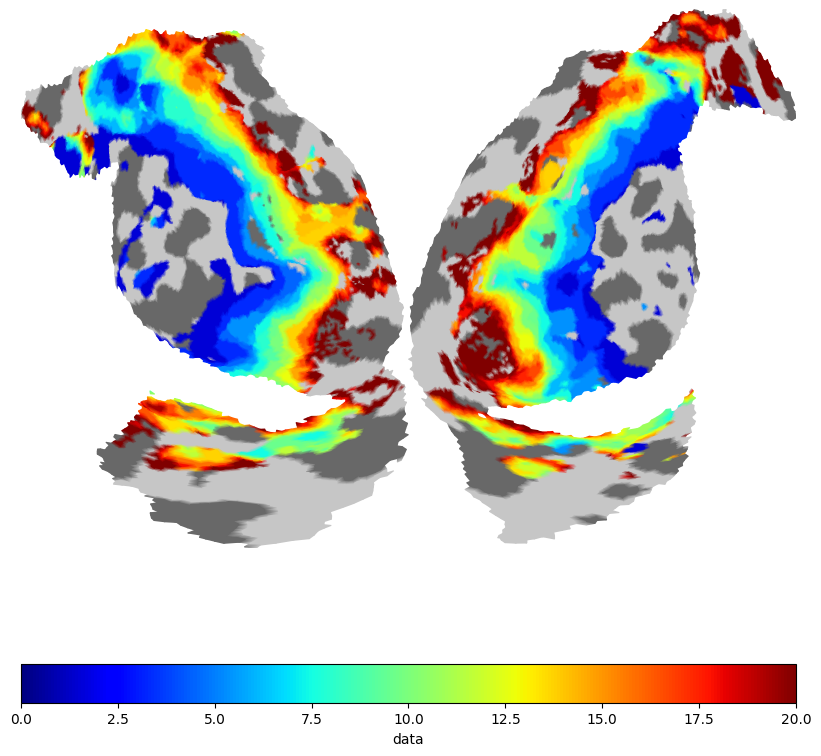

<Figure size 640x480 with 0 Axes>

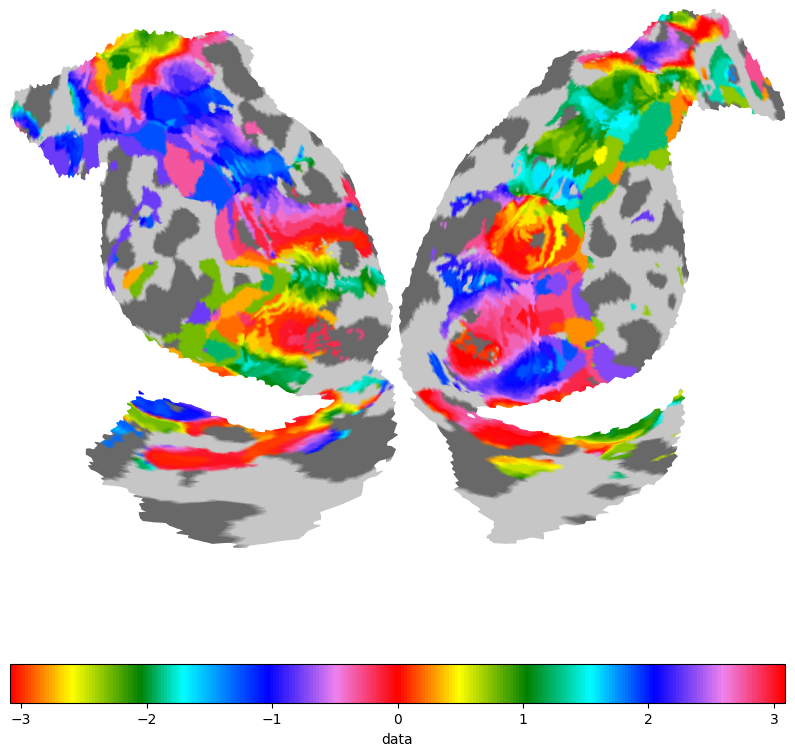

<Figure size 640x480 with 0 Axes>

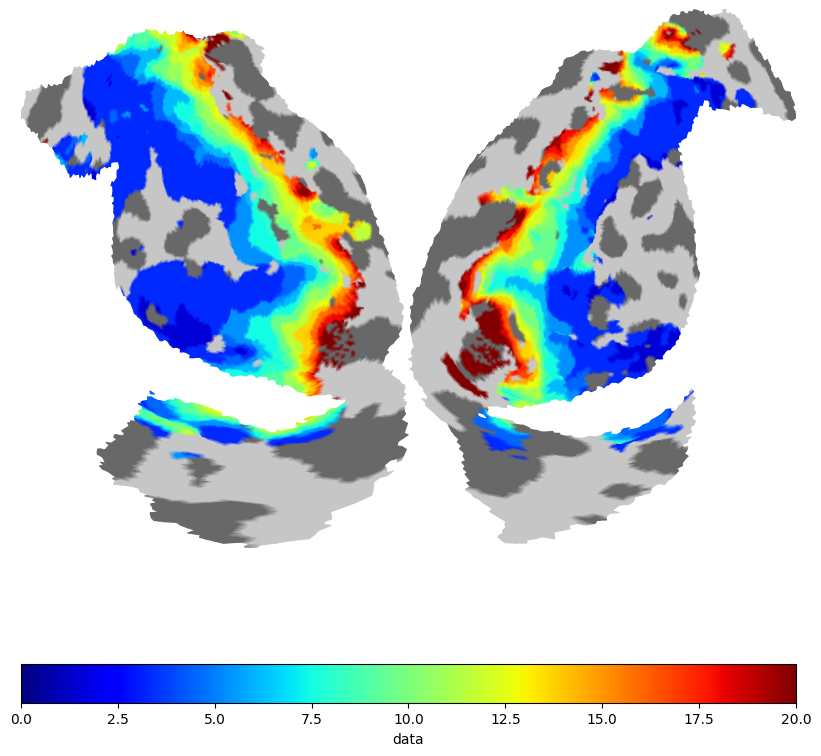

<Figure size 640x480 with 0 Axes>

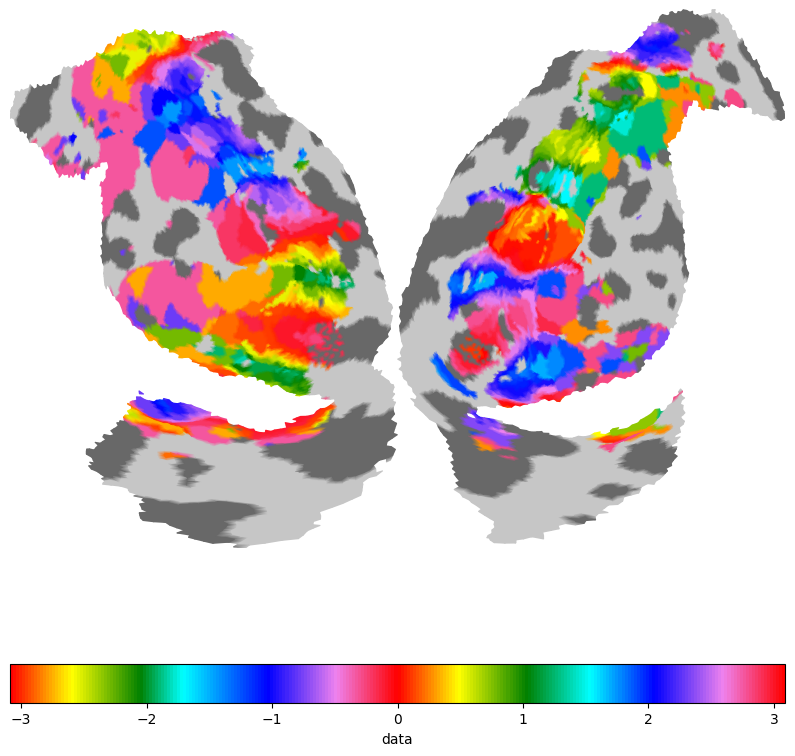

In [119]:
for k in data.keys():
    ecc,pol = dag_coord_convert(
        gp[k]['x'], gp[k]['y'], 
        'cart2pol'
    )
    tmask = (gp[k]['r2']>0.1).to_numpy()
    tmask &= (ecc<22.0).to_numpy()
    m.add_surface(
        data=ecc, 
        data_mask=tmask, 
        vmin=0.0, vmax=20.0, cmap='jet',
        surf_name=f'ecc_{k}'
    )
    m.add_surface(
        data=pol, 
        data_mask=tmask, 
        vmin=-np.pi, vmax=np.pi, cmap='marco_pol',
        surf_name=f'pol_{k}'
    )
    m.add_surface(
        data=gp[k]['r2'], 
        data_mask=tmask, 
        vmin=0, vmax=1.0, cmap='viridis',
        surf_name=f'r2_{k}'
    )
    
    plt.figure()
    m.flat_mpl(
        data=ecc, 
        data_mask=tmask, 
        vmin=0.0, vmax=20.0, cmap='jet'
    )
    plt.figure()
    m.flat_mpl(
        data=pol, 
        data_mask=tmask, 
        # vmin=-np.pi, vmax=20.0, 
        cmap='marco_pol'
    )
    # print(ecc)
    # m.add_surface(
    #     data=gp[k][]
    # )

In [120]:
m.open_fs_surface(m.surf_list)

freeview -f  lh.inflated:overlay=/Users/marcusdaghlian/projects/dp-clean-link/240522NG/hypot/derivatives/freesurfer/sub-hp01/surf/custom/lh.ecc_pRFLE:overlay_custom=0.00,0,0,127,0.51,0,0,154,1.03,0,0,186,1.54,0,0,213,2.05,0,0,245,2.56,0,0,255,3.08,0,28,255,3.59,0,52,255,4.10,0,80,255,4.62,0,108,255,5.13,0,132,255,5.64,0,160,255,6.15,0,184,255,6.67,0,212,255,7.18,5,236,241,7.69,28,255,218,8.21,50,255,195,8.72,70,255,176,9.23,92,255,154,9.74,112,255,134,10.26,134,255,112,10.77,154,255,92,11.28,176,255,70,11.79,195,255,50,12.31,218,255,28,12.82,241,252,5,13.33,255,229,0,13.85,255,203,0,14.36,255,181,0,14.87,255,155,0,15.38,255,133,0,15.90,255,107,0,16.41,255,81,0,16.92,255,59,0,17.44,255,33,0,17.95,245,11,0,18.46,213,0,0,18.97,186,0,0,19.49,154,0,0,20.00,127,0,0,:overlay=/Users/marcusdaghlian/projects/dp-clean-link/240522NG/hypot/derivatives/freesurfer/sub-hp01/surf/custom/lh.pol_pRFLE:overlay_custom=-3.14,255,0,0,-2.98,255,76,0,-2.82,255,166,0,-2.66,255,243,0,-2.50,186,220,0,-2.34,119,18

Window position QRect(49806,456 387x25) outside any known screen, using primary screen
Back buffer dpr of 2 doesn't match <NSViewBackingLayer: 0x131a55a30> contents scale of 1.82609 - updating layer to match.
Back buffer dpr of 2 doesn't match <NSViewBackingLayer: 0x131a66380> contents scale of 1.86834 - updating layer to match.
Back buffer dpr of 2 doesn't match <NSViewBackingLayer: 0x131a874f0> contents scale of 1.86834 - updating layer to match.
Back buffer dpr of 2 doesn't match <NSViewBackingLayer: 0x131a910f0> contents scale of 1.87344 - updating layer to match.
Back buffer dpr of 2 doesn't match <NSViewBackingLayer: 0x131aad4f0> contents scale of 1.87344 - updating layer to match.


In [117]:
m.surf_list

['ecc_pRFRE', 'pol_pRFRE', 'r2_pRFRE']

In [112]:
sub = 'sub-hp01'
cb = dag_load_roi(sub, 'b14_V', fs_dir, combine_matches=True)

m.make_flat_map(centre_bool=cb)

centering!
Faces with missing vx: 249219
Faces with long edges: 1475
0.10491969313871968
centering!
Faces with missing vx: 246197
Faces with long edges: 1299
0.10748388593635579


{'cmap': 'marco_pol', 'vmin': -3.141592653589793, 'vmax': 3.141592653589793}

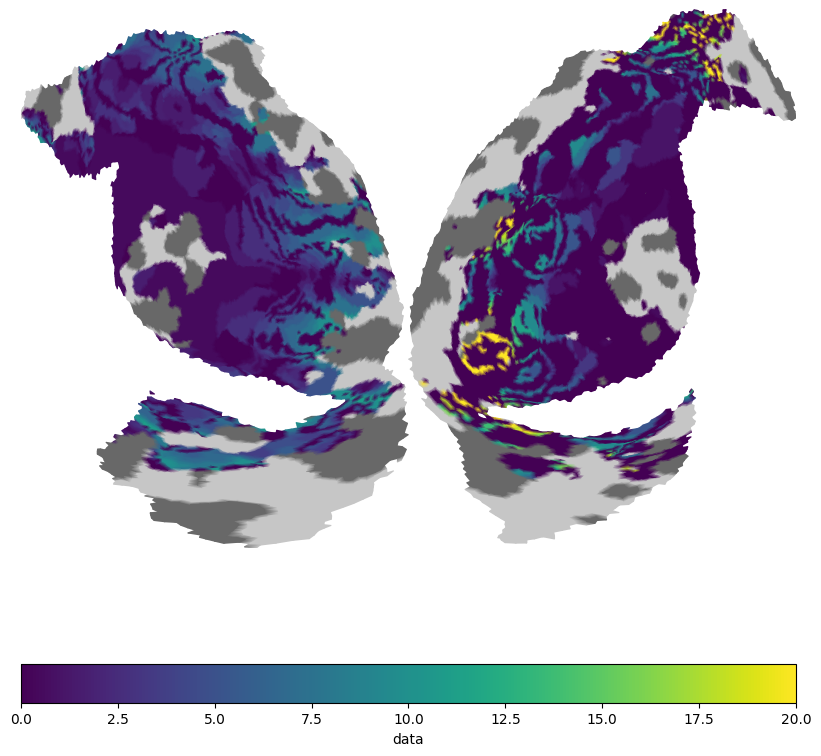

<Figure size 640x480 with 0 Axes>

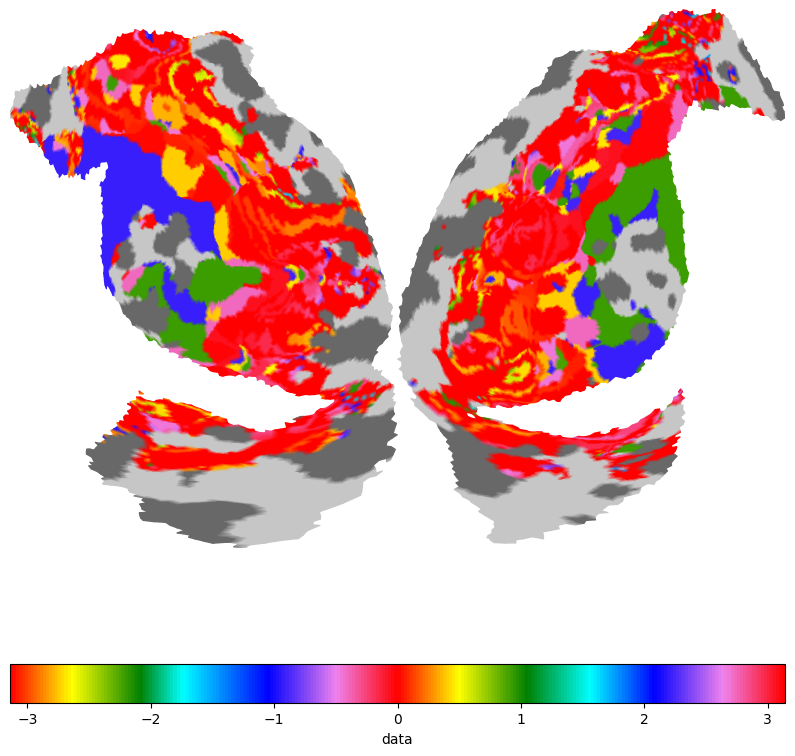

In [90]:
m.flat_mpl(
    data=ecc, 
    vmin=0.0, vmax=20.0, 
    data_sub_mask=v1, 
    data_mask=r2>0.1, 
)
plt.figure()
m.flat_mpl(
    data=pol, 
    vmin=-np.pi, vmax=np.pi, cmap='marco_pol',
    data_sub_mask=v1, 
    data_mask=r2>0.1, 
    
)

{'cmap': 'jet', 'vmin': 0, 'vmax': 1.0}

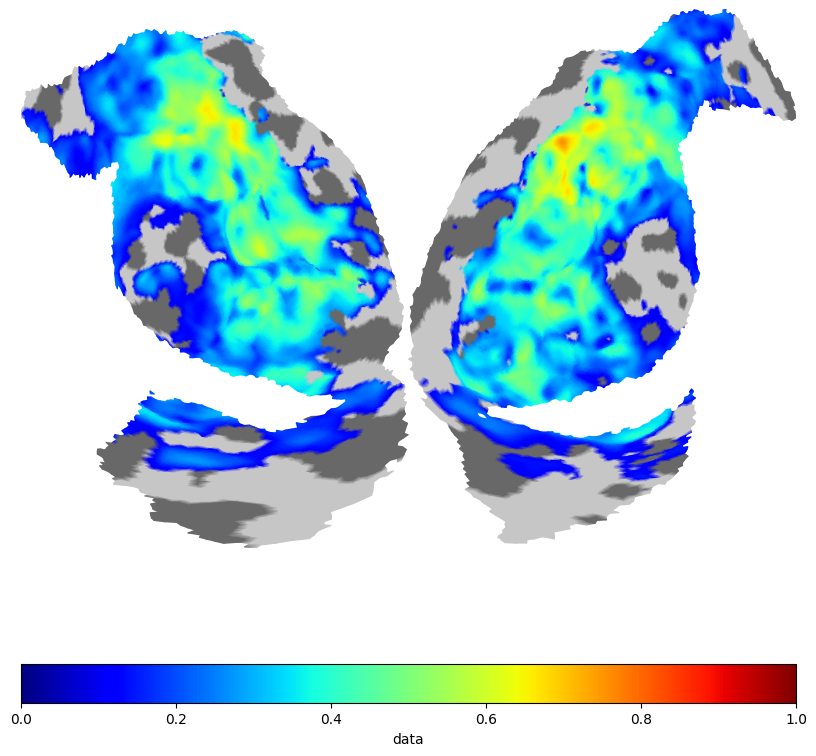

In [89]:
m.flat_mpl(
    data=r2, 
    vmin=0, vmax=1.0, cmap='jet',
    data_sub_mask=v1, 
    data_mask=r2>0.1, 
)

In [ ]:
r2

In [ ]:
!pip install scikit-learn 

In [ ]:
    grid_pars = cfitter.refine_baseline_and_amplitude(grid_pars)    
    r2 = cfitter.get_rsq(parameters=grid_pars)
    pkl2save = {
        'config' : config, 
        'pars' : grid_pars, 
        'stage' : 'grid', 
        'r2' : r2, 
        'name' : grid_out.split('/')[-1],            
        'data' : script_start_time, 
        'script' : current_script, 
        'script_str' : script_str,
    }
    with open(grid_out, 'wb') as file:
        pickle.dump(pkl2save, file)
else:
    print(grid_out_all)
    try: 
        with open(grid_out_all, 'rb') as file:
            grid_pars_full = pickle.load(file)['pars']
            grid_pars = grid_pars_full.iloc[roi_mask,:]
    except:
        with open(grid_out, 'rb') as file:
            grid_pars = pickle.load(file)['pars']
if grid_only:
    print('ONLY RUNNING GRID STAGE')
    sys.exit()
print(psc_ts_mask.shape)
print(psc_ts_mask)
# Iterative stage         
iter_out = opj(output_path, f'{sub}_ses-{eye}_task-pRF_model-gauss_stage-iter_roi-{roi}{id}.pkl')
if (not os.path.exists(iter_out)) | ow:
    if fit_hrf:
        grid_pars['hrf_delay'] = 6.0
        grid_pars['hrf_dispersion'] = 1.0
    # grid_pars to float 16 
    grid_pars = grid_pars.astype(np.float16)
    iter_pars = cfitter.fit(
        init_pars=grid_pars, 
        max_n_iterations=config['gauss']['num_steps'], 
        fixed_pars=config['gauss']['fixed_pars'],
        )        
    r2 = cfitter.get_rsq(parameters=iter_pars)
    pkl2save = {
        'config' : config, 
        'pars' : iter_pars, 
        'stage' : 'iter', 
        'r2' : r2, 
        'name' : iter_out.split('/')[-1],            
        'data' : script_start_time, 
        'script' : current_script, 
        'script_str' : script_str,
    }
    with open(iter_out, 'wb') as file:
        pickle.dump(pkl2save, file)

In [ ]:
!pip install nibabel

In [ ]:
pars = {
    'x' : np.array([-5,5,3]),
    'y' : np.array([-5,5,3]), 
    'sd' : np.array([1,1,2]),
    'baseline' : np.array([0.0, 0.0, 0.0, ]), 
    'amplitude' : np.array([10, 10, 10, ]),
}
import pandas as pd 
pars = pd.DataFrame(pars)
pars
a = model.predict(parameters=pars)
plt.plot(a.iloc[:,0])
plt.plot(a.iloc[:,1])